# Predicting student performance using machine learning¶
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not a student will be successful based on previous student performance. I will define successful below.

## 1. Problem definition
Given parameters about a student, can we predict whether or not they will be successful in subsequent classes? I define success as the likelihood that they will score a C or better, equivalent numerically to 12 on a 1-20 scale. Students who are unlikely to be successful should think about repeating the current class.

## 2. Data
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

## 3. Evaluation
What defines success? I hope to obtain at least 90% accuracy at predicting a student's performance in math on a scale of 1-20. 11 points and below equates to a grade of D or below, which do not receive credit for the class, so I consider scores of 12 points or higher to indicate that the student will be successful in the next class, although, of course, higher is better.  

## 4. Features
Features of the dataset:
* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

* sex - student's sex (binary: 'F' - female or 'M' - male)

* age - student's age (numeric: from 15 to 22)

* address - student's home address type (binary: 'U' - urban or 'R' - rural)

* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'athome' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'athome' or 'other')

* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

* guardian - student's guardian (nominal: 'mother', 'father' or 'other')

* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

* failures - number of past class failures (numeric: n if 1<=n<3, else 4)

* schoolsup - extra educational support (binary: yes or no)

* famsup - family educational support (binary: yes or no)

* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

* activities - extra-curricular activities (binary: yes or no)

* nursery - attended nursery school (binary: yes or no)

* higher - wants to take higher education (binary: yes or no)

* internet - Internet access at home (binary: yes or no)

* romantic - with a romantic relationship (binary: yes or no)

* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

* freetime - free time after school (numeric: from 1 - very low to 5 - very high)

* goout - going out with friends (numeric: from 1 - very low to 5 - very high)

* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

* health - current health status (numeric: from 1 - very bad to 5 - very good)

* absences - number of school absences (numeric: from 0 to 93)

* G1 - first period grade (numeric: from 0 to 20)

* G2 - second period grade (numeric: from 0 to 20)

* G3 - final math grade in current class (numeric: from 0 to 20, output target)

## 5. Modelling

We're going to try the following ML models, based on guidance from the SciKit Learn ML Map:

* Ridge Regression
* Lasso
* Elastic Net

If I don't achieve good enough results from those, I'll try Ridge Regression, SVR or Ensemble Regressors.

## 6. Experimentation

If you haven't hit your evaluation metric yet, ask yourself:

Could you collect more data?
Could you try a better model? Maybe Catboost or XGBoost?
Could you improve the current model beyond what you've done already?

### Preparing the tools
We're going to use Pandas, Matplotlib and numPy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import models from skikit learn
from sklearn.linear_model import Ridge, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

# Model Evaluations
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Load the data
df = pd.read_csv("student-mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,0,1,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Data exploration (exploratory data analysis EDA)
The goal is to learn more about the data and become a subject matter expert on the dataset you are using.

* What questions do you need to solve?
Whether or not the student is prepared to move on to subsequent math classes.
* What kind of data do we have and how do we treat different types?
Our problem is of type classification (should students move on or not).
* What's missing from the data and how do you deal with it?
I will check and see.
* Do we have outliers and why should you care about them?
* How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,0,1,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [5]:
# G3 is our target column - the final math grade of the students
# Let's find out the distribution of math students in general
df["G3"].value_counts()

10    57
11    47
15    33
0     32
8     32
12    32
9     31
13    31
14    27
6     16
16    16
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

In [6]:
# Get the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
# Change "higher" column to binary numbers, yes=1 and no=0
df.replace(('yes', 'no'), (1, 0), inplace=True)

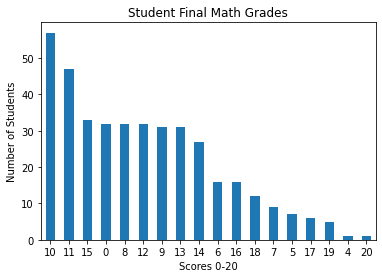

In [8]:
# We want to present our data in the easiest to understand, most explicit format possible.
df["G3"].value_counts().plot(kind="bar")
plt.title("Student Final Math Grades")
plt.xlabel("Scores 0-20")
plt.ylabel("Number of Students")
plt.xticks(rotation=0);

In [9]:
# Are there any missing values? (No)
# However, if you look through the CSV spreadsheet, there are a lot of zeroes in locations which indicate missing data.
# If data does not correlate enough to predict accurately, I may go back in and impute or disregard those zeroes.
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.394937,2.326582,1.448101,1.956962,0.334177,0.129114,0.612658,0.458228,0.508861,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.918987,10.840506,10.554430
std,1.276043,1.222037,1.169484,0.697505,0.872985,0.743651,0.335751,0.487761,0.498884,0.500555,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.313335,3.542688,4.403385
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,9.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Let's try to find patterns and correlations between data features

In [11]:
# studytime. Do students who study more earn better scores?
df.studytime.value_counts()

2    157
1    138
3     79
4     21
Name: studytime, dtype: int64

In [12]:
# Let's compare the studytime column to the target column
pd.crosstab(df.G3, df.studytime)

studytime,1,2,3,4
G3,,,,
0,17,10,2,3
4,0,1,0,0
5,4,3,0,0
6,11,5,0,0
7,4,3,2,0
8,17,13,1,1
9,6,19,6,0
10,26,21,10,0
11,9,29,8,1


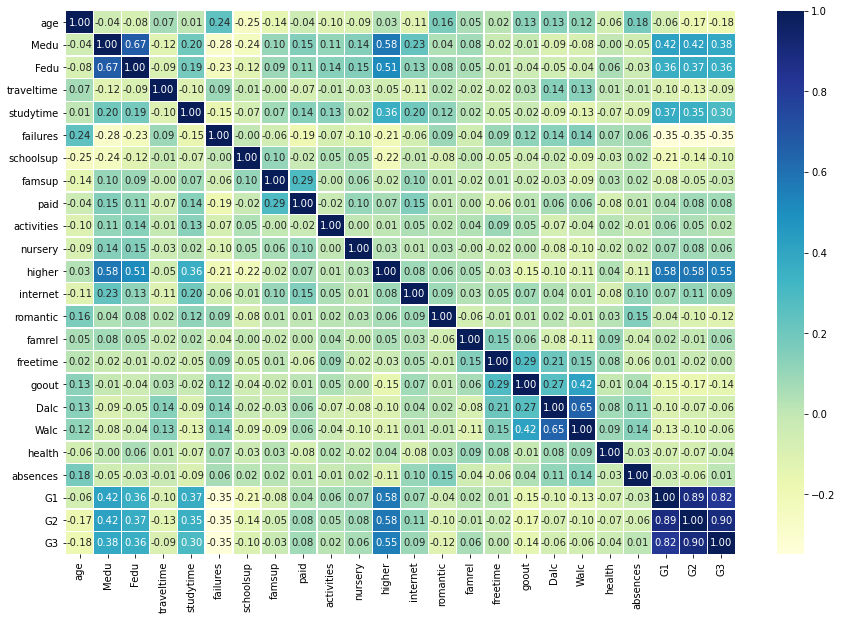

In [13]:
# A higher positive value means a higher positive correlation (student success)
# A higher negative value means a higher negative correlation (not student success)
# Let's make our correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

In [14]:
# It looks like the highest correlation to student performance(G3) is between the students grades in periods 1 & 2 (G1 & G2)
# Dalc (weekday alcohol consumption, Walc (weekend alcohol consumption) correlate with each other, but not to grades.
# Weekend alcohol consumption correlates with going out, but has no bearing on grades.
# Medu and Fedu (parents education level) correlate highly with each other, with higher and slightly with Grades.
# Study time correlates slightly with grades and also with parental education levels (Medu and Fedu).
# The highest NEGATIVE correlation features are failures to math scores, which makes sense.
# Absences seems to consistently correlate negatively also, though not very highly.
#Let's eliminate a few of the features (columns) that make little sense. 
reduced_df = df[["Medu", "Fedu", "studytime", "failures", "higher", "Dalc", "Walc", "G1", "G2", "G3"]]
reduced_df.head()

,Medu,Fedu,studytime,failures,higher,Dalc,Walc,G1,G2,G3
0,0,1,1,0,0,1,1,5,6,6
1,1,1,1,0,0,1,1,5,5,6
2,1,1,2,3,1,2,3,7,8,10
3,4,2,3,0,1,1,1,15,14,15
4,3,3,1,0,1,1,2,6,10,10


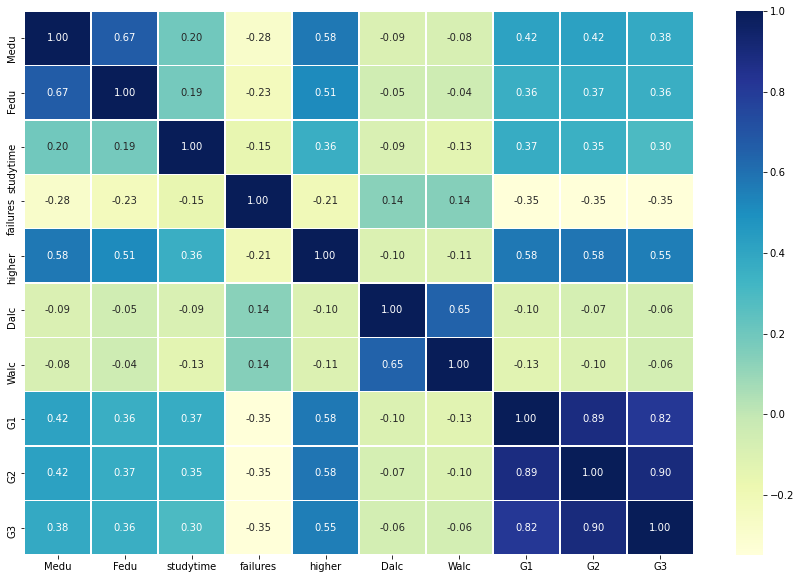

In [15]:
corr_matrix = reduced_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

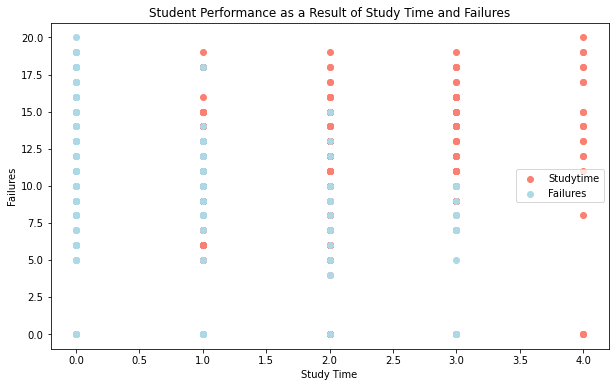

In [16]:
# Create a scatterplot
plt.figure(figsize=(10, 6))

# scatter with positive correlation
plt.scatter(df.studytime,
           df.G3,
           c="salmon")

# Scatter plot with negative correlation
plt.scatter(df.failures,
           df.G3,
           c="lightblue")

# Add some helpful information
plt.title("Student Performance as a Result of Study Time and Failures")
plt.xlabel("Study Time")
plt.ylabel("Failures")
plt.legend(["Studytime", "Failures"]);

In [17]:
# failures correlates negatively with grades.
# Since G1 & G2 (grades in 1st and 2nd period) columns seem to have the highest correlation to G3, let's look at those.
# So let's compare the G1 (grade in 1st period) column to the target column
pd.crosstab(df.G3, df.G1)

G1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
G3,,,,,,,,,,,,,,,,,
0,0,0,2,9,10,4,3,4,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0
6,0,1,2,4,5,3,1,0,0,0,0,0,0,0,0,0,0
7,0,0,2,0,4,1,1,1,0,0,0,0,0,0,0,0,0
8,0,0,0,6,8,10,5,2,1,0,0,0,0,0,0,0,0
9,0,0,0,0,2,4,8,14,3,0,0,0,0,0,0,0,0
10,0,0,0,1,4,13,10,12,14,2,1,0,0,0,0,0,0
11,0,0,0,0,2,3,2,9,12,10,7,2,0,0,0,0,0


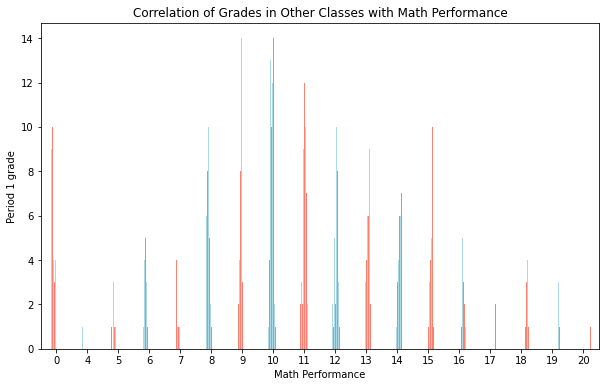

In [18]:
# Make the crosstab more visual
pd.crosstab(df.G3, df.G1).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

# Add some communication
plt.title("Correlation of Grades in Other Classes with Math Performance")
plt.xlabel("Math Performance")
plt.ylabel("Period 1 grade")
plt.legend().remove()
plt.xticks(rotation=0);

In [19]:
# Let's compare the G2 (grade in 1st period) column to the target column
pd.crosstab(df.G3, df.G2)

G2,0,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
G3,,,,,,,,,,,,,,,,,
0,7,1,6,3,4,4,5,2,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,5,6,4,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,2,3,3,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,7,13,11,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,3,5,15,7,1,0,0,0,0,0,0,0,0
10,0,0,0,0,0,4,18,26,8,1,0,0,0,0,0,0,0
11,0,0,0,0,0,2,1,11,19,13,1,0,0,0,0,0,0


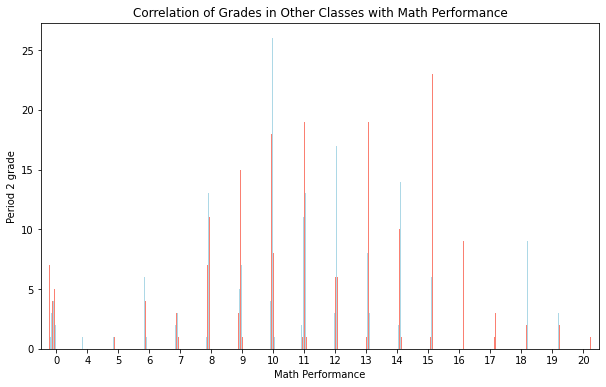

In [20]:
# Make the crosstab more visual
pd.crosstab(df.G3, df.G2).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

# Add some communication
plt.title("Correlation of Grades in Other Classes with Math Performance")
plt.xlabel("Math Performance")
plt.ylabel("Period 2 grade")
plt.legend().remove()
plt.xticks(rotation=0);

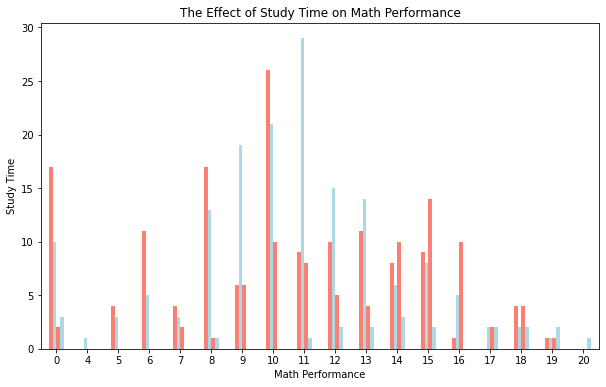

In [21]:
# Make the crosstab more visual
pd.crosstab(df.G3, df.studytime).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

# Add some communication
plt.title("The Effect of Study Time on Math Performance")
plt.xlabel("Math Performance")
plt.ylabel("Study Time")
plt.legend().remove()
plt.xticks(rotation=0);

## Modelling
The highest correlation is between G1, G2 and G3 so we should weight those features most heavily as we consider hyperparameters. We'll used the smaller dataframe from which we eliminated the least helpful columns. And we need to convert "higher" to numerical.


In [22]:
# Split data into x/y 
# X will be all columns EXCEPT target, so just drop target column
X = reduced_df.drop("G3", axis=1)
y = reduced_df["G3"]   # binary classification

# Split data into train/test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train

,Medu,Fedu,studytime,failures,higher,Dalc,Walc,G1,G2
181,3,3,2,0,1,1,2,12,13
194,2,3,1,0,1,1,1,13,14
173,1,2,2,3,0,1,1,8,7
63,2,3,3,0,0,2,4,10,9
253,2,1,1,0,0,1,3,8,9
...,...,...,...,...,...,...,...,...,...
71,1,2,1,0,0,1,1,10,10
106,2,2,1,0,0,1,1,7,8
270,1,3,2,2,0,3,3,9,9
348,4,3,3,0,1,1,3,13,15


In [24]:
y_train, len(y_train)

(181    12
 194    14
 173     0
 63      9
 253     8
        ..
 71     10
 106     8
 270     9
 348    15
 102    14
 Name: G3, Length: 316, dtype: int64,
 316)

In [25]:
# Put models in a dictionary
models = { "Ridge": Ridge(),
         "RandomForest": RandomForestRegressor(),
         "LRegression": LinearRegression(),
         "ElasticNet": ElasticNet()}

# create a function to fit (train) and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels/targets)
    X_test: testing data (no labels)
    y_test: testing labels
    y_train: training labels
    """
    
    #Make a dictionary to keep model scores
    model_scores = {}
    
    #Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append it's score to model_scores
        # We'll save the name of the model(KNN, LogisticRegressions, RandomForest) to the model_scores empty 
        # dictionary as the key and the score as the value
        model_scores[name] = model.score(X_test, y_test)
    return model_scores  # will return a dictionary
        

In [26]:
model_scores = fit_and_score(models=models, 
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Ridge': 0.772164008738353,
 'RandomForest': 0.828101298714787,
 'LRegression': 0.7721207919866366,
 'ElasticNet': 0.7826566472496042}

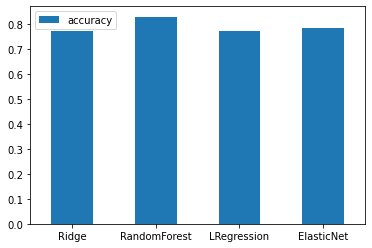

In [27]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

RandomForest is the best model at ~83%, but not as high as we'd like. Let's try adjusting hyperparameters.

In [28]:
# Let's check MSE and MAE to calculate the error
from sklearn.metrics import mean_absolute_error, mean_squared_error

# calculating the performance of the Random Forest Regression Model
rf = RandomForestRegressor(random_state=42)
rfModel = rf.fit(X_train, y_train)
y_pred_r = rfModel.predict(X_test)
mae_r = mean_absolute_error(y_test, y_pred_r)
mse_r = mean_squared_error(y_test, y_pred_r)
print(f"MAE: {mae_r}  \nMSE: {mse_r}")

MAE: 1.2781476793248947  
MSE: 3.5168857426160334


### This is actually really good!

## Tuning our LogisticRegression model hyperparameters using GridSearchCV
Since our Random Forest model provides the best scores so far, we'll try to improve them using GridSearchCV

1. Specify the maximum depth of the trees. By default, trees are expanded until all leaves are either pure or contain less than the minimum samples for the split. This can still cause the trees to overfit or underfit. Play with the hyperparameter to find an optimal number for max_depth.
2. Increase or decrease the number of estimators. How does changing the number of trees affect performance? More trees usually means higher accuracy at the cost of slower learning. If you wish to speed up your random forest, lower the number of estimators. If you want to increase the accuracy of your model, increase the number of trees.
3. Specify the maximum number of features to be included at each node split. This depends very heavily on your dataset. If your independent variables are highly correlated, you’ll want to decrease the maximum number of features. If your input attributes are not correlated and your model is suffering from low accuracy, increase the number of features to be included.

In [29]:
# Let's start by trying to tune our RandomForestRegression model. 

# Set up two empty lists
train_scores = []
test_scores = []

# Create a list of different values for n_estimators  (default is 100)
estimators = range(100, 1000, 100)

# instantiate
rfr = RandomForestRegressor()

# Loop through the values
for i in estimators:
    rfr.set_params(n_estimators=i)
    
    # Fit the algorithm
    rfr.fit(X_train, y_train)
    
    # update the training scores list
    train_scores.append(rfr.score(X_train, y_train))
    
    # update test scores list
    test_scores.append(rfr.score(X_test, y_test))

In [30]:
train_scores

[0.9707492769997701,
 0.9707091676347064,
 0.9701757282893343,
 0.9704994504912433,
 0.970620661093342,
 0.9703370787147019,
 0.9702294284048862,
 0.9701066560418463,
 0.9699198037720596]

In [31]:
test_scores

[0.8163798576347417,
 0.8087071844552681,
 0.829514845257692,
 0.8236912928579937,
 0.8195914653207785,
 0.8215835096394677,
 0.8218252313771577,
 0.8236266409961585,
 0.8244473602337792]

### The best score for n_estimators seems to be 500, so we'll go with that.

In [32]:
# Let's test values for max_depth
# Set up two empty lists
train_scores_max_depth = []
test_scores_max_depth = []

# Create a list of different values for max_depth  (default is none)
estimators = range(1, 32)

# instantiate
rfr = RandomForestRegressor()

# Loop through the values
for i in estimators:
    rfr.set_params(max_depth=i)
    
    # Fit the algorithm
    rfr.fit(X_train, y_train)
    
    # update the training scores list
    train_scores_max_depth.append(rfr.score(X_train, y_train))
    
    # update test scores list
    test_scores_max_depth.append(rfr.score(X_test, y_test))

In [33]:
train_scores_max_depth

[0.5812030601651887,
 0.783235883515828,
 0.8256004628360101,
 0.8544801794572222,
 0.8905117472112479,
 0.9204249038183305,
 0.9436381861850588,
 0.955676401735845,
 0.9662840455963722,
 0.9670903336043367,
 0.9704520625894887,
 0.9681076955639889,
 0.9686832210596507,
 0.968703953508714,
 0.9705129186705876,
 0.968369903416564,
 0.9674260167915004,
 0.9695421865541909,
 0.969890732926313,
 0.9691030200485581,
 0.966988732696413,
 0.9697875820990108,
 0.9697550020732199,
 0.9717991647651395,
 0.9675653001441169,
 0.9682332592541931,
 0.970452508361909,
 0.9681385547126371,
 0.9706277362568868,
 0.9681136688419691,
 0.9697381971985732]

In [34]:
test_scores_max_depth

[0.6546908556661768,
 0.7169720836649758,
 0.7568864250537932,
 0.7840491077396149,
 0.8054948223393289,
 0.8010064691243961,
 0.8060396021172932,
 0.7971598442246578,
 0.8188340667778491,
 0.8156682244156309,
 0.8203814790289282,
 0.8085767941636174,
 0.8296079380509871,
 0.8194883080292633,
 0.8235006131865574,
 0.8150093308581585,
 0.8331585276932243,
 0.8265054237703724,
 0.8190766431519022,
 0.8243115447769447,
 0.8315651074700123,
 0.8155255232784773,
 0.8103893663506624,
 0.8240908445077558,
 0.8273275778603959,
 0.8085858863511324,
 0.8234813218013439,
 0.8289902420582507,
 0.818956054600585,
 0.8185129265978995,
 0.822366549010609]

## 24 seems to be the best parameter for max_depth

In [35]:
# Best hyperparameters for our model
param_grid = {  'max_depth': [24], 'max_features': ['auto', 'log2'], 'n_estimators': [500]}

rfr = RandomForestRegressor(random_state=1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 5, verbose = True)

# Fit grid hyperparameter search model
g_search_train_model = g_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [36]:
g_search_test_model = g_search.score(X_test, y_test)
g_search_test_model

0.8411180473981418

### That's a decent improvement, I'll take it.

In [37]:
# calculating the performance of the TUNED Random Forest Regression Model
y_pred_r = g_search_train_model.predict(X_test)
mae_r = mean_absolute_error(y_test, y_pred_r)
mse_r = mean_squared_error(y_test, y_pred_r)
print(f"MAE: {mae_r}  \nMSE: {mse_r}")

MAE: 1.1699689873417722  
MSE: 3.0693926071624476


In [47]:
# Let's create a visualization to see if it helps us understand.
df1 = pd.DataFrame(data={"actual values": y_test, "predicted values": y_pred_r})
df1["differences"] = df1["predicted values"] - df1["actual values"]
df1

,actual values,predicted values,differences
78,10,7.086000,-2.914000
371,12,12.170000,0.170000
248,5,3.960000,-1.040000
55,10,9.526000,-0.474000
390,9,8.372000,-0.628000
...,...,...,...
364,12,11.314133,-0.685867
82,6,4.888000,-1.112000
114,9,8.062000,-0.938000
3,15,14.710000,-0.290000


# Let's turn this puppy into an interactive dashboard with Voila!

We'll start by adding some widgets.
The steps required to make an interactive dashboard can be summarized as:

1. Create one Section, level-2 markdown header (##)
2. On this section add some code that shows ipywidgets controls and tag the cell with body (same as any other content)
3. Add one or multiple regular Jupyter-flex Sections (##)
4. Create an Output ipywidget that holds the outputs for the dashboard
5. Use the interact() or observe() functions from ipywidgets to update Output widget
6. Tag a code cell that outputs the Output widget with body
7. Run the notebook using voila

In [38]:
import ipywidgets as widgets
from ipywidgets import Layout


widgets.Dropdown(
    options=[('None', 1), ('Elementary School', 2), ('High School', 3), ('College', 4)],
    value=2,
    description='Mothers Education Level:',
)

Dropdown(description='Mothers Education Level:', index=1, options=(('None', 1), ('Elementary School', 2), ('Hi…

In [39]:
widgets.Dropdown(
    options=[('None', 1), ('Elementary School', 2), ('High School', 3), ('College', 4)],
    value=2,
    description='Fathers Education Level:',
)


Dropdown(description='Fathers Education Level:', index=1, options=(('None', 1), ('Elementary School', 2), ('Hi…

In [40]:
widgets.Dropdown(
    options=[('Under two hours per week', 1), ('2-5 hours per week', 2), ('5-10 hours per week', 3), ('10+ hours per week', 4)],
    value=2,
    description='Study Time:',
)

Dropdown(description='Study Time:', index=1, options=(('Under two hours per week', 1), ('2-5 hours per week', …

In [41]:
widgets.Dropdown(
    options=[('Zero', 0), ('One', 1), ('Two', 2), ('Three or more', 3)],
    value=2,
    description='Number of Class Failures in Your Past:',
)

Dropdown(description='Number of Class Failures in Your Past:', index=2, options=(('Zero', 0), ('One', 1), ('Tw…

In [42]:
widgets.RadioButtons(
    options=['Yes', 'No'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Do you plan to go to college?',
    disabled=False
)

RadioButtons(description='Do you plan to go to college?', options=('Yes', 'No'), value='Yes')

In [43]:
widgets.Dropdown(
    options=[("I don't drink alcohol on weekdays", 1), ('One day per week', 2), ('Two days per week', 3), ('Three days per week', 4), ('Four or more days per week', 5)],
    value=2,
    description='How often do you consume alcohol during weekdays?',
)

Dropdown(description='How often do you consume alcohol during weekdays?', index=1, options=(("I don't drink al…

In [44]:
widgets.Dropdown(
    options=[("No alchol", 1), ('Low alcohol', 2), ('Some alcohol', 3), ('A lot of alcohol', 4), ('Consistently wasted', 5)],
    value=2,
    description='Rate the amount of alcohol you consume during weekends: ',
)

Dropdown(description='Rate the amount of alcohol you consume during weekends: ', index=1, options=(('No alchol…